IITK PROJECT : AI PROJECT: Should This Loan be Approved or Denied?
NAME : VAISHNAV KRISHNA P

In [2]:
# importing Necessory Libraries
import pandas as pd
import numpy as np

STEP 1: COLLECTION OF DATA

In [3]:
pd.set_option('display.max_columns',27)
df = pd.read_csv("SBAnational.csv")

/var/folders/15/6wmpjnb12xv6kx2m290xw72c0000gn/T/ipykernel_1666/1705384101.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SBAnational.csv")


STEP 2: PREPRATION OF DATA

In [4]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


Data set contains 899164 training instances and 27 features

In [5]:
df.shape

(899164, 27)

In [6]:
df.describe(include ='all')

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.991640e+05,899150,899134,899150,899164.000000,897605,897598,899164.000000,899164,899164.0,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000,894636,896582,162699,896796,899164,899164,897167,899164,899164,899164
unique,NaN,779583,32581,51,NaN,5802,56,NaN,9859,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,8,6448,8472,118859,15,2,83165,22128,38326
top,NaN,SUBWAY,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,NaN,7-Jul-93,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,13-Mar-10,31-Jul-95,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
freq,NaN,1269,11558,130619,NaN,86853,118116,NaN,1131,76040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420288,782822,734,10371,43787,899150,739609,737152,69394,49579
mean,4.772612e+09,NaN,NaN,NaN,53804.391241,NaN,NaN,398660.950146,NaN,NaN,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.538175e+09,NaN,NaN,NaN,31184.159152,NaN,NaN,263318.312759,NaN,NaN,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000014e+09,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.589758e+09,NaN,NaN,NaN,27587.000000,NaN,NaN,235210.000000,NaN,NaN,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.361439e+09,NaN,NaN,NaN,55410.000000,NaN,NaN,445310.000000,NaN,NaN,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.904627e+09,NaN,NaN,NaN,83704.000000,NaN,NaN,561730.000000,NaN,NaN,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

I'm not concerned with ChgOffDate since we're focused on whether or not a loan gets charged off at all rather than when it happens, but the other columns could pose issues. Let's start by removing records from some of these columns with null values.
I decided to remove the rows entirely rather than imputing because we have a large number of records to work with, and it's hard to know what would be the best imputing method would be given the nature of the information (for example, I don't want to just assume whether the business was new or existing as this has the potential to be a very important feature for us to consider).

In [8]:
# Drop null values from specified columns
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Next, I want to start making sure each field is the appropriate data type.

In [9]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

Looks like we're going to need to make some changes here. I begin with the currency fields that are currently being read as objects rather than floats.

In [10]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [11]:
# Remove '$', commas, and extra spaces from records in columns with dollar values that should be floats
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000.00,0.00,P I F,0.00,229000.00,229000.00


In [12]:
# Check the number of each data type in the field
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    759570
<class 'str'>    126670
Name: ApprovalFY, dtype: int64

In [13]:
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

In [14]:
# Create a function to apply formatting to the records of str type only
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x


df['ApprovalFY'] = df['ApprovalFY'].apply(clean_str).astype('int64')

In [15]:
# Change the type of NewExist to an integer, Zip and UrbanRural to str (categorical) and all currency-related fields to float values
df = df.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Check to see dtypes so far
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

I want to address the NAICS codes next. These refer to the industry each business belongs to, where each additional number is like a more granular filter that pinpoints the specific type of business. We're only really concerned with the general industry for this analysis, so we use the first two digits of each business's NAICS code to determine this. Luckily, a list was provided of the industries corresponding to the first two numbers of the NAICS codes, so we can use this as a reference.

In [16]:
# Create a new column with the industry the NAICS code represents
# Selects only the first two numbers of the NAICS code
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])
# Maps the approprate industry to each record based on the first two digits of the NAICS code
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

# Remove records where Industry is NaN (NAICS code was a 0)
df.dropna(subset=['Industry'], inplace=True)
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2,...,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail_trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2,...,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accom/Food_serv
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1,...,1,0,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Healthcare/Social_assist
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1,...,1,0,N,N,NaN,30-Jun-97,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2,...,1,0,N,Y,NaN,30-Jun-98,45000.0,0.0,P I F,0.0,45000.0,36000.0,Other_no_pub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899156,9995473009,"FABRICATORS STEEL, INC.",BALTIMORE,MD,21224,BANK OF AMERICA NATL ASSOC,MD,332431,27-Feb-97,1997,60,20,1,...,1,0,0,N,NaN,30-Jun-97,50000.0,0.0,P I F,0.0,50000.0,25000.0,Manufacturing
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,314912,27-Feb-97,1997,36,40,1,...,1,0,N,N,NaN,31-Mar-97,200000.0,0.0,P I F,0.0,200000.0,150000.0,Manufacturing
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1,...,1,0,0,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0,Retail_trade
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1,...,1,0,Y,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0,Retail_trade


. I take a look at FranchiseCode next. The code itself isn't important to me; I care more about whether or not a business is a franchise or not for this analysis. I create a flag field for this.

In [17]:
# Creat a new feature based on the FranchiseCode -> 'isFrenchise'
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0  # Not Frenchised
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

In [18]:
# NewExist
# Makesure NewExist has only 1s and 2s; Remove records where NewExist isn't 1 or 2
df['NewExist'].unique()

array([2, 1, 0])

In [19]:
# Keep records where NewExist == 1 or 2
# 1 Existing Business
# 2 New Business
# Record with 0 is simply Excluded from the data set
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field
df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

/var/folders/15/6wmpjnb12xv6kx2m290xw72c0000gn/T/ipykernel_1666/1907300454.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0


In [20]:
# RevLineCr and LowDoc
# Double check RevLineCr and LowDoc unique values
df['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [21]:
df['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [22]:
# Remove records where RevLineCr != 'Y' or 'N' and LowDoc != 'Y' or 'N'
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')]
df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

# RevLineCr and LowDoc: 0 = No, 1 = Yes
df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

# Check that it worked
print(df['RevLineCr'].unique())
print(df['LowDoc'].unique())

[0 1]
[1 0]


In [23]:
# changing the value of MIS STATUS 0 to PIF and 1 to CHGOFF
df['Target'] = np.where(df['MIS_Status'] == 'P I F', 1, 0)
df['Target'].value_counts()

1    358558
0     98382
Name: Target, dtype: int64

In [24]:
# Convert ApprovalDate and DisbursementDate columns to datetime values
# ChgOffDate not changed to datetime since it is not of value and will be removed later
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [25]:
# Create DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

# Change DaysToDisbursement from a timedelta64 dtype to an int64 dtype
# Converts series to str, removes all characters after the space before 'd' in days for each record, then changes the dtype to int
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [26]:
# Create DisbursementFY field for time selection criteria later
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

other metric I was interested in exploring is whether or not the bank servicing the loan was in the same state that the business was located. My assumption is that it would be more difficult to service a loan for a business in another state and that this could have a negative impact on a business's ability to repay the loan.

In [27]:
# Create StateSame flag field which identifies where the business State is the same as the BankState
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

The next field I decided to create relates to the amount of the loan the SBA guaranteed. This is a unique feature SBA loans have where the SBA will 'guaranty' a percentage of the loan in the event of a loss. For example if a business took out a 500,000 loan and the SBA guaranteed 50%, if the business was unable to repay 200,000 of the loan the SBA would cover 100,000 of that loss. This makes these loans very attractive to small businesses because it mitigates their risk, but it also increases the risk for the SBA. This is why an analysis like this is important! These loans are typically guaranteed on a percentage basis rather than a specified dollar amount, so I create a field to represent this rather than the guaranteed amount provided in the original dataset.

In [28]:
# Create SBA_AppvPct field since the guaranteed amount is based on a percentage of the gross loan amount rather than dollar amount in most situations
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

I wanted to look at whether the loan amount disbursed was equal to the full amount approved, so I added that feature as well.

In [29]:
# Create AppvDisbursed flag field signifying if the loan amount disbursed was equal to the full amount approved
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

In [30]:
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [31]:
# Format dtypes where necessary after feature engineering
df = df.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

Now that each field we care about appears to have the correct data type, we can remove the fields that won't provide much value to the analysis.
These are as follows:

LoanNr_ChkDgt and Name - provides no value to the actual analysis

City and Zip - each have a large number of unique values, and my assumption is that it is not likely either would have any particularly significant values

Bank - Name of the bank shouldn't matter for analysis, however this could potentially be used when revisiting this analysis to determine the asset size of the bank servicing the loan

ChgOffDate - only applies when a loan is charged off and isn't relevant to the analysis

NAICS - replaced by Industry

NewExist - replaced by NewBusiness flag field

FranchiseCode - replaced by IsFranchise flag field

ApprovalDate and DisbursementDate - hypothesis that DaysToDisbursement will be more valueable

SBA_Appv - guaranteed amount is based on percentage of gross loan amount, not dollar amount typically

MIS_Status - Default field replaces this as the target field

In [32]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [33]:
# Verify all null values are removed from data
df.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Target                0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64

In [34]:
# Check the shape of the data as it stands
df.shape

(456940, 21)

In [35]:
df.head(20)

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,Industry,IsFranchise,NewBusiness,Target,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed
0,IN,OH,1997,84,4,0,0,0,0,1,60000.0,60000.0,Retail_trade,0,1,1,730,1999,0,0.80,1
1,IN,IN,1997,60,2,0,0,0,0,1,40000.0,40000.0,Accom/Food_serv,0,1,1,92,1997,1,0.80,1
2,IN,IN,1997,180,7,0,0,0,0,0,287000.0,287000.0,Healthcare/Social_assist,0,0,1,306,1997,1,0.75,1
5,CT,DE,1997,120,19,0,0,0,0,0,517000.0,517000.0,Manufacturing,0,0,1,122,1997,0,0.75,1
7,FL,AL,1997,84,1,0,0,0,0,1,45000.0,45000.0,Other_no_pub,0,1,1,487,1998,0,0.80,1
8,FL,FL,1997,297,2,0,0,0,0,0,305000.0,305000.0,Accom/Food_serv,0,1,1,153,1997,1,0.75,1
10,NC,GA,1997,84,1,0,0,0,0,1,70000.0,70000.0,Other_no_pub,0,1,1,360,1998,0,0.80,1
11,IL,OR,1997,60,24,0,0,0,0,0,150000.0,300000.0,Construction,0,0,1,275,1997,0,0.75,0
12,NC,MN,2006,162,2,0,0,1,0,0,253400.0,253400.0,Retail_trade,1,1,1,52,2006,0,0.75,1
15,OK,NC,1997,12,5,0,0,0,0,0,350000.0,350000.0,Wholesale_trade,0,1,1,214,1997,0,0.75,1


In [36]:
# Dropping state and BankState Since it is not very relevant for us and completed the Feature enginering
# by adding feature Same Columns
df.drop(columns=['State','BankState'],inplace=True)

In [37]:
df.dtypes

ApprovalFY              int64
Term                    int64
NoEmp                   int64
CreateJob               int64
RetainedJob             int64
UrbanRural             object
RevLineCr               int64
LowDoc                  int64
DisbursementGross     float64
GrAppv                float64
Industry               object
IsFranchise             int64
NewBusiness             int64
Target                  int64
DaysToDisbursement      int64
DisbursementFY          int64
StateSame               int64
SBA_AppvPct           float64
AppvDisbursed           int64
dtype: object

In [38]:
df["Industry"].unique()

array(['Retail_trade', 'Accom/Food_serv', 'Healthcare/Social_assist',
       'Manufacturing', 'Other_no_pub', 'Construction', 'Wholesale_trade',
       'Educational', 'RE/Rental/Lease', 'Prof/Science/Tech',
       'Information', 'Finance/Insurance', 'Admin_sup/Waste_Mgmt_Rem',
       'Arts/Entertain/Rec', 'Trans/Ware', 'Ag/For/Fish/Hunt',
       'Public_Admin', 'Utilities', 'Mgmt_comp', 'Min/Quar/Oil_Gas_ext'],
      dtype=object)

In [39]:
industry_mapping = {
    'Retail_trade': 0,
    'Accom/Food_serv':1,
    'Healthcare/Social_assist': 2,
    'Manufacturing':4,
    'Other_no_pub':5,
    'Construction':6,
    'Wholesale_trade':7,
    'Educational':8,
    'RE/Rental/Lease':9,
    'Prof/Science/Tech':10,
    'Information':11,
    'Finance/Insurance':12,
    'Admin_sup/Waste_Mgmt_Rem':13,
    'Arts/Entertain/Rec':14,
    'Trans/Ware':15,
    'Ag/For/Fish/Hunt':16,
    'Public_Admin':17,
    'Utilities':18,
    'Mgmt_comp':19,
    'Min/Quar/Oil_Gas_ext':20,
}

In [40]:
# Create the 'Industry_Encoded' column using the mapping dictionary
df['Industry_Encoded'] = df['Industry'].map(industry_mapping)
df.head(25)

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,Industry,IsFranchise,NewBusiness,Target,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Industry_Encoded
0,1997,84,4,0,0,0,0,1,60000.0,60000.0,Retail_trade,0,1,1,730,1999,0,0.800000,1,0
1,1997,60,2,0,0,0,0,1,40000.0,40000.0,Accom/Food_serv,0,1,1,92,1997,1,0.800000,1,1
2,1997,180,7,0,0,0,0,0,287000.0,287000.0,Healthcare/Social_assist,0,0,1,306,1997,1,0.750000,1,2
5,1997,120,19,0,0,0,0,0,517000.0,517000.0,Manufacturing,0,0,1,122,1997,0,0.750000,1,4
7,1997,84,1,0,0,0,0,1,45000.0,45000.0,Other_no_pub,0,1,1,487,1998,0,0.800000,1,5
8,1997,297,2,0,0,0,0,0,305000.0,305000.0,Accom/Food_serv,0,1,1,153,1997,1,0.750000,1,1
10,1997,84,1,0,0,0,0,1,70000.0,70000.0,Other_no_pub,0,1,1,360,1998,0,0.800000,1,5
11,1997,60,24,0,0,0,0,0,150000.0,300000.0,Construction,0,0,1,275,1997,0,0.750000,0,6
12,2006,162,2,0,0,1,0,0,253400.0,253400.0,Retail_trade,1,1,1,52,2006,0,0.750000,1,0
15,1997,12,5,0,0,0,0,0,350000.0,350000.0,Wholesale_trade,0,1,1,214,1997,0,0.750000,1,7


In [41]:
df.drop(['Industry'],axis=1,inplace=True)

In [42]:
df.head(10)

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,NewBusiness,Target,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Industry_Encoded
0,1997,84,4,0,0,0,0,1,60000.0,60000.0,0,1,1,730,1999,0,0.80,1,0
1,1997,60,2,0,0,0,0,1,40000.0,40000.0,0,1,1,92,1997,1,0.80,1,1
2,1997,180,7,0,0,0,0,0,287000.0,287000.0,0,0,1,306,1997,1,0.75,1,2
5,1997,120,19,0,0,0,0,0,517000.0,517000.0,0,0,1,122,1997,0,0.75,1,4
7,1997,84,1,0,0,0,0,1,45000.0,45000.0,0,1,1,487,1998,0,0.80,1,5
8,1997,297,2,0,0,0,0,0,305000.0,305000.0,0,1,1,153,1997,1,0.75,1,1
10,1997,84,1,0,0,0,0,1,70000.0,70000.0,0,1,1,360,1998,0,0.80,1,5
11,1997,60,24,0,0,0,0,0,150000.0,300000.0,0,0,1,275,1997,0,0.75,0,6
12,2006,162,2,0,0,1,0,0,253400.0,253400.0,1,1,1,52,2006,0,0.75,1,0
15,1997,12,5,0,0,0,0,0,350000.0,350000.0,0,1,1,214,1997,0,0.75,1,7


In [43]:
df.dtypes

ApprovalFY              int64
Term                    int64
NoEmp                   int64
CreateJob               int64
RetainedJob             int64
UrbanRural             object
RevLineCr               int64
LowDoc                  int64
DisbursementGross     float64
GrAppv                float64
IsFranchise             int64
NewBusiness             int64
Target                  int64
DaysToDisbursement      int64
DisbursementFY          int64
StateSame               int64
SBA_AppvPct           float64
AppvDisbursed           int64
Industry_Encoded        int64
dtype: object

In [44]:
df.isnull().sum()

ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
IsFranchise           0
NewBusiness           0
Target                0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
Industry_Encoded      0
dtype: int64

Ready for the STEP 3 Now the data frame is clean and ready for Data Analysis

# Data Visualisation

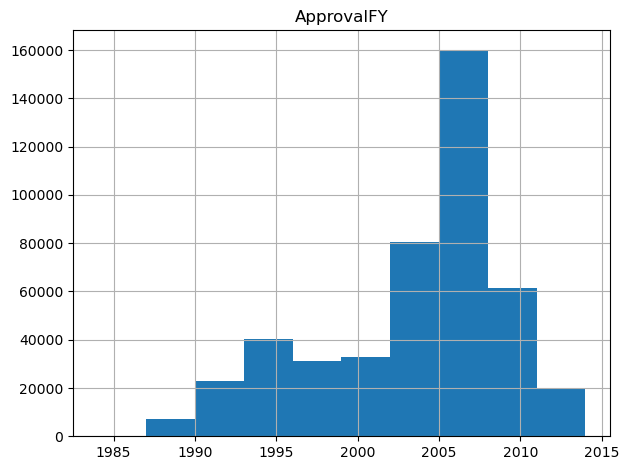

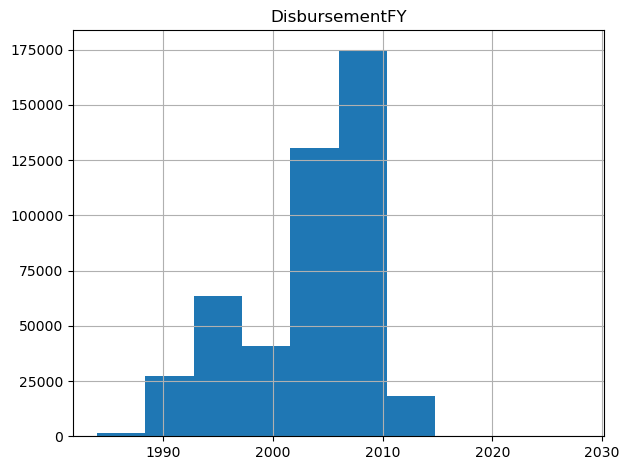

In [45]:
import matplotlib.pyplot as plt
df.hist(['ApprovalFY'])
plt.tight_layout()
df.hist(['DisbursementFY'])
plt.tight_layout()
plt.show()

Note: Analysis of 'ApprovalFY' Data using Matplotlib

Upon analyzing the data using the provided code, it was observed that the years between 2005 and 2008 
exhibited the highest rate for 'ApprovalFY'

Note: Analysis of 'DisbursementFY' Data using Matplotlib

After analyzing the 'DisbursementFY' data using the provided code, it was observed that the highest rate of disbursements occurred between the years 2001 and 2010.

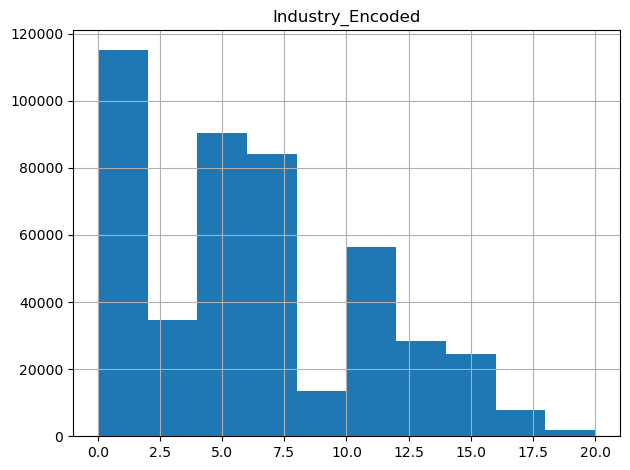

In [46]:
df.hist(['Industry_Encoded'])
plt.tight_layout()
plt.show()

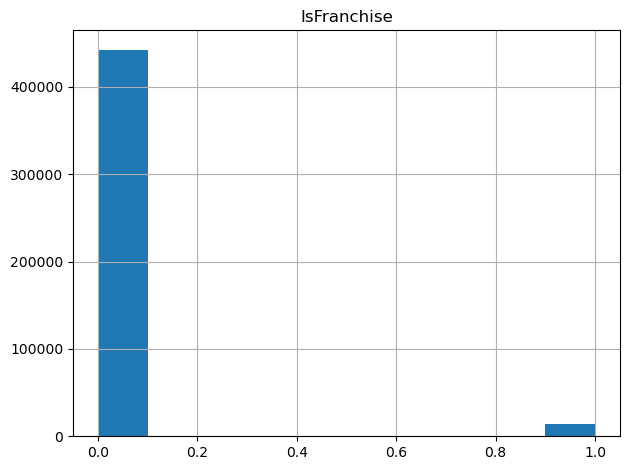

In [47]:
df.hist(['IsFranchise'])
plt.tight_layout()
plt.show()


Note: Analysis of 'IsFranchise' Data using Matplotlib

Upon analyzing the 'IsFranchise' data using the provided code, it was observed that the majority of people are not affiliated with a franchise.

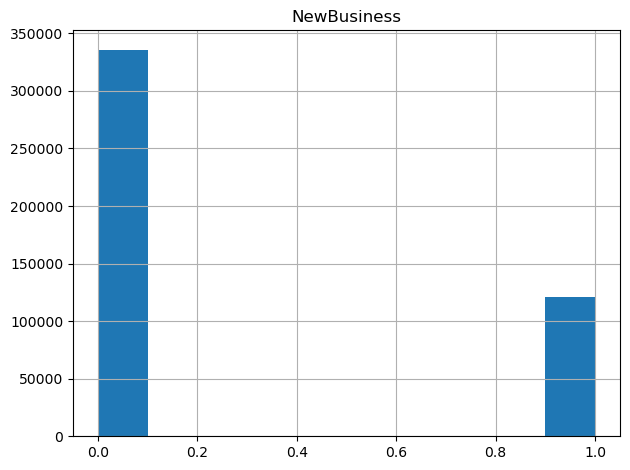

In [48]:
df.hist(['NewBusiness'])
plt.tight_layout()
plt.show()


Note: Analysis of 'NewBusiness' Data using Matplotlib

Upon analyzing the 'NewBusiness' data using the provided code, it was observed that the majority of the entries in the dataset indicate existing businesses rather than new businesses.

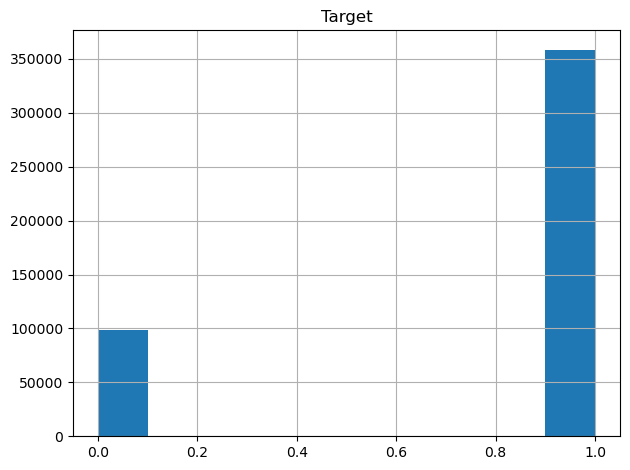

In [49]:
df.hist(['Target'])
plt.tight_layout()
plt.show()

Note: Analysis of 'Target' Data using Matplotlib

Upon analyzing the 'Target' data using the provided code, it was observed that the majority of the data in the dataset indicates that the amount is paid in full.

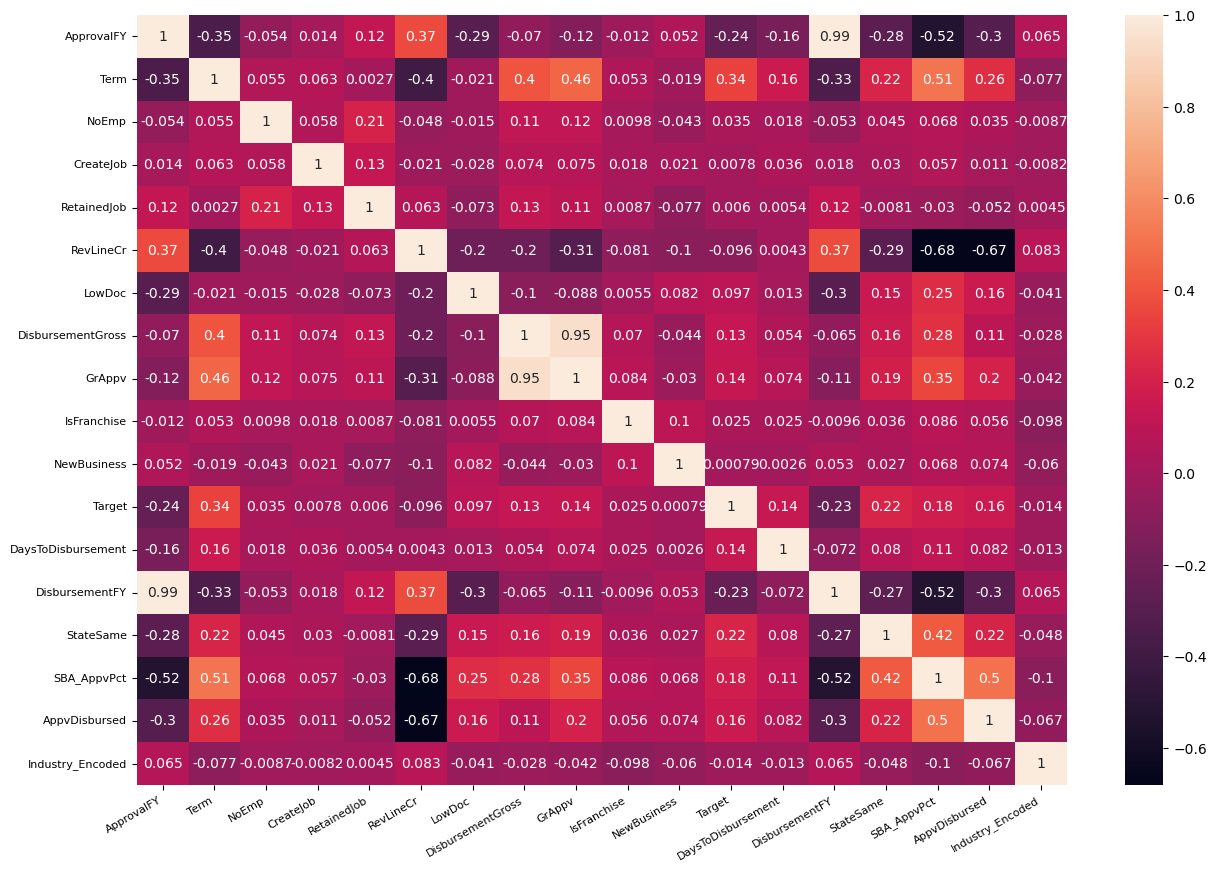

In [50]:
# Correlation Matrix
import seaborn as sns
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = df.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

Some notable correlations:

GrAppv & DisbursementGross, Positive - Makes sense that in most situations, the amount disbursed is close to what was approved

DisbursedGreaterAppv & AppvDisbursed, Negative - Also makes sense since when the disbursed amount is greater than approved, the disbursed amount is then not equal to the approved amount

RevLineCr & DisbursedGreaterAppv, Positive - Due to the nature of revolving lines of credit (think of it like a credit card for businesses where the business can draw funds with a limit, pays it off when able, and then draw more funds again), this makes sense that over time more funds are used then the limit set for the loan

DisbursementFY & ApprovalFY, Positive - More often than not, the funds will be disbursed in the same year they are approved

AppvDisbursed & RevLineCr, Negative - Typically, based on my experience underwriting loans as a Credit Analyst, the limit for a line of credit is lower than a term loan on average since the business can continually draw funds from the line of credit when needed after paying off the balance, which would explain the negative relationship.

SBA_AppvPct & RevLineCr, Negative - SBA lines of credit can still be eligible for guarantees, however the guarantee percentage is dependant on the size of the loan. Although this doesn't quite explain the negative relationship between SBA guarantee percentage and a loan being RevLineCr, what could is the type of SBA loan program used for the loan application.


# Data Splitting in Training Features and Target Feature

In [51]:
X = df.drop(columns=['Target'])
Y = df["Target"]

In [52]:
print(X.shape)
X.head(10)

(456940, 18)


,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,NewBusiness,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Industry_Encoded
0,1997,84,4,0,0,0,0,1,60000.0,60000.0,0,1,730,1999,0,0.80,1,0
1,1997,60,2,0,0,0,0,1,40000.0,40000.0,0,1,92,1997,1,0.80,1,1
2,1997,180,7,0,0,0,0,0,287000.0,287000.0,0,0,306,1997,1,0.75,1,2
5,1997,120,19,0,0,0,0,0,517000.0,517000.0,0,0,122,1997,0,0.75,1,4
7,1997,84,1,0,0,0,0,1,45000.0,45000.0,0,1,487,1998,0,0.80,1,5
8,1997,297,2,0,0,0,0,0,305000.0,305000.0,0,1,153,1997,1,0.75,1,1
10,1997,84,1,0,0,0,0,1,70000.0,70000.0,0,1,360,1998,0,0.80,1,5
11,1997,60,24,0,0,0,0,0,150000.0,300000.0,0,0,275,1997,0,0.75,0,6
12,2006,162,2,0,0,1,0,0,253400.0,253400.0,1,1,52,2006,0,0.75,1,0
15,1997,12,5,0,0,0,0,0,350000.0,350000.0,0,1,214,1997,0,0.75,1,7


In [53]:
print(Y.shape)
Y.head(10)

(456940,)


0     1
1     1
2     1
5     1
7     1
8     1
10    1
11    1
12    1
15    1
Name: Target, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

test_data_size = 0.25

seed_value = 7

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_data_size,random_state=seed_value)

In [55]:
print(X_train.shape)
X_train.head(10)

(342705, 18)


,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,NewBusiness,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Industry_Encoded
739518,2004,49,18,0,18,1,1,0,50066.0,30000.0,0,0,50,2004,1,0.50,0,0
254833,2008,23,6,0,6,1,0,0,25000.0,25000.0,0,0,29,2007,1,0.85,1,0
466746,2011,84,1,1,1,1,1,0,25000.0,25000.0,0,1,168,2011,1,0.50,1,14
22523,2005,12,2,0,2,1,0,0,100000.0,100000.0,0,0,7,2005,0,0.50,1,16
44213,2005,13,1,0,30,2,0,0,50000.0,50000.0,0,0,105,2005,0,0.50,1,1
870551,1996,249,3,0,0,0,0,1,61800.0,61800.0,0,0,141,1996,1,0.80,1,2
11079,2005,25,2,0,0,2,0,0,50000.0,50000.0,0,0,54,2004,0,0.50,1,6
830747,2005,24,9,0,0,1,1,0,355114.0,150000.0,0,0,143,2005,1,0.50,0,8
219061,2007,30,1,0,1,1,1,0,88610.0,40000.0,0,0,32,2007,0,0.50,0,14
363154,1989,300,4,0,0,0,0,0,184000.0,184000.0,0,0,41,1989,0,0.75,1,2


In [56]:
print(X_test.shape)
X_test.head(10)

(114235, 18)


,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,NewBusiness,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Industry_Encoded
226151,2007,24,5,0,5,1,1,0,385557.0,50000.0,0,0,9,2006,0,0.500000,0,10
507823,2001,66,11,0,0,2,0,0,300000.0,300000.0,0,0,43,2001,1,0.750000,1,4
361896,1989,84,1,0,0,0,0,0,30000.0,30000.0,0,0,53,1989,1,0.900000,1,6
413914,2001,63,3,0,0,1,0,0,18720.0,46721.0,0,1,50,2000,1,0.800004,0,1
541517,2002,196,5,0,0,2,0,0,387000.0,387000.0,0,0,32,2002,1,0.750000,1,0
103831,2006,74,6,0,6,1,1,0,100000.0,100000.0,0,0,48,2006,0,0.500000,1,0
610163,1994,180,4,0,0,0,0,0,248000.0,248000.0,0,1,255,1994,0,0.750000,1,0
842537,2005,31,8,0,0,1,1,0,131139.0,50000.0,0,0,22,2005,1,0.500000,0,6
529007,2012,84,5,5,5,1,1,0,50300.0,20000.0,0,0,3,2012,0,0.500000,0,6
425339,2001,240,45,9,45,1,0,0,921000.0,921000.0,0,0,125,2001,1,1.000000,1,4


In [57]:
print(Y_train.shape)
Y_train.head(10)

(342705,)


739518    0
254833    0
466746    1
22523     1
44213     0
870551    1
11079     0
830747    1
219061    0
363154    1
Name: Target, dtype: int64

In [58]:
print(Y_test.shape)
Y_test.head(10)

(114235,)


226151    1
507823    0
361896    1
413914    1
541517    0
103831    0
610163    1
842537    0
529007    1
425339    1
Name: Target, dtype: int64

 # Spot checking
 
 #CODES ARE MADE IN COMMENT MODE TO REDUCE LARGE TIME COMPLEXITY AFTER EXICUTING - RESULT ALSO COMMENTED
 
1)Logistic Regression.

2)Linear Discriminant Analysis(LDA).

3)k-Nearest Neighbors (kNN).

4)Naive Bayes (=NB = GaussianNB).

5)Classification and Regression Trees(CART).

6)Support Vector Machines (svm) (SVC-Support Vector Classifier)

7)RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

import time

import warnings


pipelines = []

pipelines.append(('LR', Pipeline([('LR', LogisticRegression())])))

pipelines.append(('LDA', Pipeline([('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('KNN', Pipeline([('KNN', KNeighborsClassifier())])))

pipelines.append(('NB', Pipeline([('NB', GaussianNB())])))

pipelines.append(('CART', Pipeline([('CART', DecisionTreeClassifier())])))

pipelines.append(('SVM', Pipeline([('SVM', SVC())])))

pipelines.append(('RF', Pipeline([('RF', RandomForestClassifier())])))

results = []

names = []

print("\n\n\nAccuracies of algorithms without standardization\n")

with warnings.catch_warnings():

    warnings.simplefilter("ignore")
    
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    
    for name, model in pipelines:
    
        start = time.time()
        
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        
        end = time.time()
        
        results.append(cv_results)
        
        names.append(name)
        
        print("%-5s: %10f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end - start))


With Sample data set
Validation Score for LogisticRegression :  0.8518277902992987

Validation Score for Linear Discriminant Analysis: 0.8668576550306968

Validation Score for KNN:  0.8330936858975517

Validation Score for GaussianNB:  0.4322099539457261

Validation Score for CART Decision Tree : 0.9233521939995587

Validation Score for SVM :  0.8087450662595463

#Validation Score for RandomForestClassifier:  0.9446528383252597

Random forest very well in this

# Standerdising the data set

# Standardize the dataset
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold

import time

pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))

pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))

pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())]))) 

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))

pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))


results = []

names = []

print("\n\n\nAccuracies of algorithm after scaled dataset\n")

with warnings.catch_warnings():

    warnings.simplefilter("ignore")
    
    kfold = KFold(n_splits=10, random_state=123, shuffle=True) 
    
    for name, model in pipelines:
    
        start = time.time()
        
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        
        end = time.time()
        
        results.append(cv_results)
        
        names.append(name)
        
        print("%-7s: %10f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end - start))


With Sample data set

Accuracies of algorithm after scaled dataset

ScaledLR:   0.850001 (0.007329) (run time: 1.933956)
    
ScaledLDA:   0.810039 (0.010552) (run time: 1.861354)
    
ScaledKNN:   0.870836 (0.006551) (run time: 13.334325)
    
ScaledNB:   0.570360 (0.012952) (run time: 0.942753)
    
ScaledCART:   0.912899 (0.005411) (run time: 2.099120)
    
ScaledSVM:   0.876438 (0.005621) (run time: 144.870245)
    
ScaledRF:   0.932420 (0.006339) (run time: 25.382902)

Before and after Standerdisation Random Forest Works Well
We can Train the model with the Random forest

# Training The Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time



model = RandomForestClassifier()
start = time.time() 
model.fit(X_train, Y_train)  
end = time.time()
print("\n\nRandomForest Training Completed. It's Run Time: %f" % (end - start))



RandomForest Training Completed. It's Run Time: 91.027478


# AccuracyScore 

In [60]:
predictions = model.predict(X_test)
print("All predictions done successfully by Random Forest Learning Algorithms")
print("\n\nAccuracy score %f" % accuracy_score(Y_test, predictions))

All predictions done successfully by Random Forest Learning Algorithms


Accuracy score 0.945201


# TESTING THE MODEL

In [61]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix = \n")
print(confusion_matrix(Y_test, predictions))

confusion_matrix = 

[[20746  3892]
 [ 2368 87229]]


True Positives (TP): 20746 - The number of instances that are actually positive (Class 1) and were correctly predicted as positive.

False Positives (FP): 3892 - The number of instances that are actually negative (Class 0) but were incorrectly predicted as positive.

True Negatives (TN): 87229 - The number of instances that are actually negative and were correctly predicted as negative.

False Negatives (FN): 2368 - The number of instances that are actually positive but were incorrectly predicted as negative.